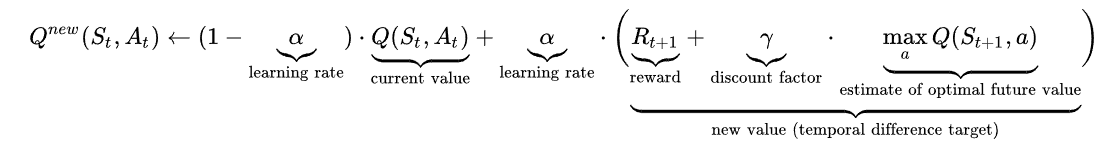

In [1]:
import math

import numpy as np
from cartpole import CartPoleEnv

In [2]:
# constants
learning_rate = 0.1
discount = 0.9995
episodes = 200000
exploration_rate = 1

In [5]:
# get environment
env = CartPoleEnv(render_mode='rgb_array')

# Q table
pos_space = np.linspace(-2.4, 2.4, 10)
vel_space = np.linspace(-4, 4, 10)
ang_space = np.linspace(-0.2095, 0.2095, 20)
ang_vel_space = np.linspace(-4, 4, 20)

q_table = np.random.uniform(
    low=0,
    high=1,
    size=(
        len(pos_space) + 1,
        len(vel_space) + 1,
        len(ang_space) + 1,
        len(ang_vel_space) + 1,
        env.action_space.n,
    ),
)
print(q_table.shape)

(11, 11, 21, 21, 2)


In [6]:
# Q learning
total_rewards = 0
for episode in range(episodes + 1):
    state = env.reset()[0]
    discrete_state = np.array(
        [
            np.digitize(state[i], bins)
            for i, bins in enumerate([pos_space, vel_space, ang_space, ang_vel_space])
        ]
    )

    terminated = False
    episode_reward = 0
    while not terminated:
        if np.random.random() > exploration_rate:
            # exploit
            action = np.argmax(q_table[tuple(discrete_state)])
        else:
            # explore
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, info = env.step(action)
        new_discrete_state = np.array(
            [
                np.digitize(new_state[i], bins)
                for i, bins in enumerate([pos_space, vel_space, ang_space, ang_vel_space])
            ]
        )

        if not terminated:  # update q-table
            q_table[tuple(discrete_state) + (action,)] += learning_rate * (
                reward
                + discount * np.max(q_table[tuple(new_discrete_state)])
                - q_table[tuple(discrete_state) + (action,)]
            )
        episode_reward += reward
        discrete_state = new_discrete_state

    exploration_rate = max(0.05, min(1, 1.0 - math.log10((episode + 1) / 5000)))
    print(f'Episode: {episode}, reward: {episode_reward}, exploration rate: {exploration_rate}')

    total_rewards += episode_reward
    if total_rewards / (episode + 1) > 1000:
        break

env.close()

q_trained = q_table

Episode: 0, reward: 97.0, exploration rate: 1
Episode: 1, reward: 32.0, exploration rate: 1
Episode: 2, reward: 9.0, exploration rate: 1
Episode: 3, reward: 25.0, exploration rate: 1
Episode: 4, reward: 10.0, exploration rate: 1
Episode: 5, reward: 16.0, exploration rate: 1
Episode: 6, reward: 14.0, exploration rate: 1
Episode: 7, reward: 12.0, exploration rate: 1
Episode: 8, reward: 24.0, exploration rate: 1
Episode: 9, reward: 17.0, exploration rate: 1
Episode: 10, reward: 13.0, exploration rate: 1
Episode: 11, reward: 9.0, exploration rate: 1
Episode: 12, reward: 14.0, exploration rate: 1
Episode: 13, reward: 33.0, exploration rate: 1
Episode: 14, reward: 43.0, exploration rate: 1
Episode: 15, reward: 49.0, exploration rate: 1
Episode: 16, reward: 14.0, exploration rate: 1
Episode: 17, reward: 15.0, exploration rate: 1
Episode: 18, reward: 20.0, exploration rate: 1
Episode: 19, reward: 46.0, exploration rate: 1
Episode: 20, reward: 30.0, exploration rate: 1
Episode: 21, reward: 23.0

KeyboardInterrupt: 

In [ ]:
# get environment
final_env = CartPoleEnv(render_mode='human')

for episode in range(episodes + 1):
    state = final_env.reset()[0]
    discrete_state = np.array(
        [
            np.digitize(state[i], bins)
            for i, bins in enumerate([pos_space, vel_space, ang_space, ang_vel_space])
        ]
    )

    terminated = False
    while not terminated:
        action = np.argmax(q_table[tuple(discrete_state)])
        new_state, reward, terminated, truncated, info = final_env.step(action)
        discrete_state = np.array(
            [
                np.digitize(new_state[i], bins)
                for i, bins in enumerate([pos_space, vel_space, ang_space, ang_vel_space])
            ]
        )

env.close()


KeyboardInterrupt: 

: 